Do your work for this exercise in a jupyter notebook named `feature_engineering` within the `regression-exercises` repo. Add, commit, and push your work.

In [2]:
# import env for personal print_library function
from env import print_libs

In [11]:
print_libs()

import itertools -> iterations
import time -> time and date work
from tqdm import tqdm -> progress bars on for loopsimport pandas as pd -> large scale database work
import numpy as np -> advanced numerical work
import matplotlib.pyplot as plt -> plotting work
import seaborn as sns -> advanced and intuitive plotting
from scipy import stats -> statistical work
from pydataset import data -> list of datasets
import os -> operating system work
import warnings -> getting rid of pesky warnings
from sklearn import metrics -> model metrics
from sklearn.impute import SimpleImputer -> dynamic value filling
from sklearn.model_selection import train_test_split -> splitting datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree -> DT modeling
from sklearn.neighbors import KNeighborsClassifier -> KNN modeling
from sklearn.ensemble import RandomForestClassifier -> RF modeling
from sklearn.linear_model import LogisticRegression -> LR modeling
from sklearn.preprocessing import MinMaxScaler,

In [80]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# pull specific modules
from time import time
from pydataset import data
from sklearn.feature_selection import SelectKBest, RFE, f_regression,SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

1. Load the `tips` dataset.
    1. Create a column named `price_per_person`. This should be the total bill divided by the party size.
    2. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?
    3. Use Select K Best to select the top 2 features for predicting tip amount. What are they?
    4. Use Recursive Feature Elimination to select the top 2 features for tip amount. What are they?
    5. Why do you think Select K Best and Recursive Feature Elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

In [36]:
# load the tips dataset
tips = data('tips')

In [40]:
# see the shape
tips.shape

(244, 7)

In [42]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


Observations:
- day is formatted as an object, so is the data formatted like Monday, Tuesday, etc.?
- time is also an object, so what values are present?

In [48]:
# Answer 1st question
tips.day.value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [58]:
# Answer 2nd question
tips.time.value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [62]:
# rename size column
tips = tips.rename(columns={'size':'party_size'})

In [72]:
# create column price_per_person
# price_per_person = total_bill / party_size
tips['price_per_person'] = (tips.total_bill / tips.party_size).round(2)

In [112]:
tips.head()

,total_bill,tip,sex,smoker,day,time,party_size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.49
2,10.34,1.66,Male,No,Sun,Dinner,3,3.45
3,21.01,3.50,Male,No,Sun,Dinner,3,7.00
4,23.68,3.31,Male,No,Sun,Dinner,2,11.84
5,24.59,3.61,Female,No,Sun,Dinner,4,6.15


In [118]:
# split the data
train,val_test = train_test_split(tips,train_size=0.6,random_state=123)
validate,test = train_test_split(val_test,train_size=0.5,random_state=123)

In [122]:
train.shape,validate.shape,test.shape

((146, 8), (49, 8), (49, 8))

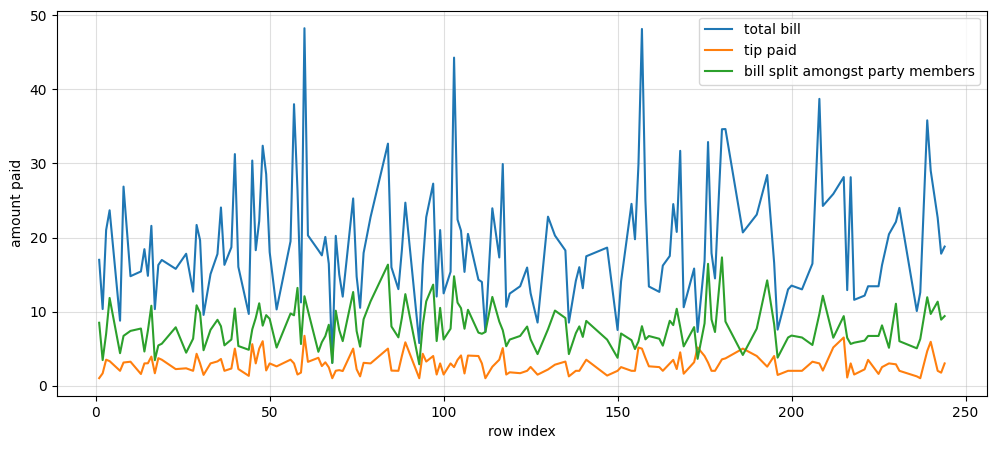

In [130]:
plt.figure(figsize=(12,5))
sns.lineplot(train.total_bill,label='total bill')
sns.lineplot(train.tip,label='tip paid')
sns.lineplot(train.price_per_person,label='bill split amongst party members')

plt.grid(alpha=0.4)
plt.legend()
plt.ylabel('amount paid')
plt.xlabel('row index')
plt.show()

Based on the graph above, there doesn't seem to be a lot of good correlation between the tip paid and the total bill, or even the bill when split.

In [128]:
len(train.columns)-1

7

> examine features potentially relevant

**Features I believe to be relevant to predicting tip, ranked:**
1. day
2. time
3. sex
4. price_per_person
5. smoker
6. party_size
7. total_bill

In [157]:
# create encoding function
# or rather, just pull it from the Telco Report project
def encode_df(df,target):
    '''
    Takes a processed dataframe and encodes the object columns for usage in modeling.
    
    Takes a dataframe and a target variable (assuming the target variable is an object). Target variable keeps the thing the model is being trained on from splitting and altering it.
    
    !!! MAKE ME MORE DYNAMIC !!!
    - Add functionality to check if passed a list or dataframe
    - If dataframe, then run standard loop
    - If list then check if each item is a dataframe (checking for train/validate/test)
    - If list and each item is dataframe, then try loop on each dataframe
    - Otherwise return an error
    '''
    # Get the object columns from the dataframe
    obj_col = [col for col in df.columns if df[col].dtype == 'O']
    
    # remove target variable
    if target in obj_col:
    obj_col.remove(target)
    
    # Begin encoding the object columns
    for col in obj_col:
        # Grab current column dummies
        dummies = pd.get_dummies(df[col],drop_first=True)
        
        # concatenate the names in a descriptive manner
        dummies.columns = [col+'_is_'+column for column in dummies.columns]

        # add these new columns to the dataframe
        for column in dummies.columns:
            df[column] = dummies[column].astype(float)
        
        # Drop the old columns from the dataframe
        df = df.drop(columns=col)
    
    return df   

In [163]:
df = train.copy()
target = 'tip'
obj_col = [col for col in df.columns if df[col].dtype == 'O']
    
if target in obj_col:
    print(True)
else:
    print(False)

False


In [142]:
# show the shapes of train, validate, and test for comparison later
train.shape,validate.shape,test.shape

((146, 8), (49, 8), (49, 8))

In [146]:
# split into X
tvt_set = train,validate,test

X_set = X_train,X_validate,X_test = [df.drop(columns=['tip']) for df in tvt_set]
X_train.shape,X_validate.shape,X_test.shape

((146, 7), (49, 7), (49, 7))

In [152]:
# get the y's
y_set = y_train,y_validate,y_test = [df.tip for df in tvt_set]
y_train.shape,y_validate.shape,y_test.shape

((146,), (49,), (49,))

In [ ]:
encode_df

In [150]:
# select top 2 features using SelectKBest
kbest = SelectKBest(f_regression,k=2)

kbest.fit(X_train,y_train)


ValueError: could not convert string to float: 'Male'

In [27]:
# select top 2 features using RFE

2. Write a function named `select_kbest` that takes in the predictors (X), the target (y), and the number of features to select (`k`) and returns the names of the top `k` selected features based on the `SelectKBest` class. Test your function with the `tips` dataset. You should see the same results as when you did the process manually.

3. Write a function named `rfe` that takes in the predictors, the target, and the number of features to select. It should return the top `n` features based on the `RFE` class. Test your function with the `tips` dataset. You should see the same results as when you did the process manually.

4. Load the `swiss` dataset and use all the other features to predict Fertility. Find the top 3 features using both Select K Best and Recursive Feature Elimination (use the functions you just built to help you out).